In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Feature extraction

In [ ]:
# coding= UTF-8
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import soundfile as sf

##Return audio features 
def feature_extraction(file_name):
    X, sample_rate = librosa.load(file_name)
    if X.ndim > 1:
        X = X[:,0]
    X = X.T
    
    #Perform fourier transformation
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    #chromagram
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    #mel spectrogram
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    #contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0) #tonal centroid features
    
    ##Return computed features
    return mfccs, chroma, mel, contrast, tonnetz
    
# Process audio files: Return arrays with features and labels
def parse_audio_files(parent_dir, sub_dirs, file_ext='*.ogg'): 
    features, labels = np.empty((0,193)), np.empty(0) #
    
    for label, sub_dir in enumerate(sub_dirs): #.
        for file_name in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)): 
            try:
                mfccs, chroma, mel, contrast, tonnetz = feature_extraction(file_name)
            except Exception as e:
                print("[Error] there was an error in feature extraction. %s" % (e))
                continue
                
            extracted_features = np.hstack([mfccs,chroma, mel, contrast, tonnetz]) #Stack arrays in sequence horizontally (column wise)
            features = np.vstack([features, extracted_features]) #Stack arrays in sequence vertically (row wise).
            labels = np.append(labels, label)
        print("Extracted features from %s, done" % (sub_dir))
    return np.array(features), np.array(labels, dtype = np.int) ## arrays with features and corresponding labels for each audio

def one_hot_encode(labels): 
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode



In [ ]:
audio_directories = os.listdir("/content/drive/MyDrive/hda/hda_project/esc_10 model/Environmental-Sound-Classification-ESC-using-neural-networks-and-other-classifiers/audio-data")
audio_directories.sort()
print('Audio Classes: ', audio_directories)

Audio Classes:  ['001 - Dog bark', '002 - Rain', '003 - Sea waves', '004 - Baby cry', '005 - Clock tick', '006 - Person sneeze', '007 - Helicopter', '008 - Chainsaw', '009 - Rooster', '010 - Fire crackling']


In [ ]:
parent = "/content/drive/MyDrive/hda/hda_project/esc_10 model/Environmental-Sound-Classification-ESC-using-neural-networks-and-other-classifiers/audio-data/"
ext = '001 - Dog bark'

In [ ]:
dogs = parent+ext

In [ ]:

audio_dog = os.listdir(dogs)[0]
path_dog = dogs+'/'+audio_dog

In [ ]:
path_dog

'/content/drive/MyDrive/hda/hda_project/esc_10 model/Environmental-Sound-Classification-ESC-using-neural-networks-and-other-classifiers/audio-data/001 - Dog bark/1-59513-A.ogg'

In [ ]:
X, sample_rate = librosa.load(path_dog)

## Example of signals pre processing, applied to a specific signal

eg. Dog's bark

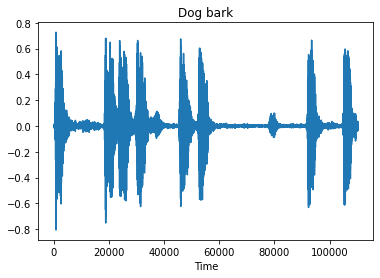

In [ ]:
plt.plot(X)
plt.title('Dog bark')
plt.xlabel('Time')
plt.show()

In [ ]:
#MFCCS
stft = np.abs(librosa.stft(X))
mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40) #40 values


In [ ]:
import librosa.display

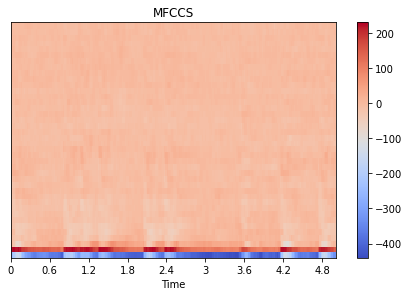

In [ ]:
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('MFCCS')
plt.show()


In [ ]:
#mel spectogram
mel = librosa.feature.melspectrogram(y=X, sr=sample_rate)

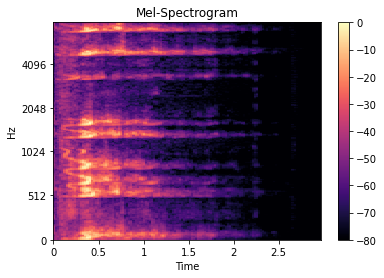

In [ ]:
librosa.display.specshow(librosa.power_to_db(mel.transpose(), ref=np.max), y_axis='mel', x_axis='time', fmax=8000)
plt.colorbar()
plt.title('Mel-Spectrogram')
plt.show()



In [ ]:
chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)

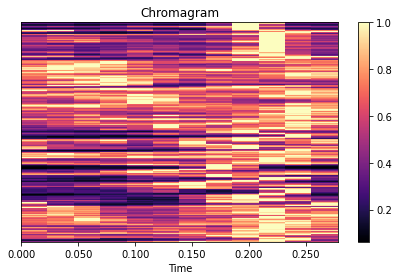

In [ ]:
librosa.display.specshow(chroma.transpose(), x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

In [ ]:
##Get labels and features
## saved outside 
features, labels = parse_audio_files('audio-data', audio_directories) #(parent dir,sub dirs)
np.save('feat.npy', features) ##NumPy array file created. Files are binary files to store numpy arrays
np.save('label.npy', labels)

Extracted features from 001 - Dog bark, done
Extracted features from 002 - Rain, done
Extracted features from 003 - Sea waves, done
Extracted features from 004 - Baby cry, done
Extracted features from 005 - Clock tick, done
Extracted features from 006 - Person sneeze, done
Extracted features from 007 - Helicopter, done
Extracted features from 008 - Chainsaw, done
Extracted features from 009 - Rooster, done
Extracted features from 010 - Fire crackling, done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
path = '/content/drive/MyDrive/hda/hda_project/esc_10 model/Environmental-Sound-Classification-ESC-using-neural-networks-and-other-classifiers/'

In [ ]:
# Label integer encoding 
labels = np.load(path+'label_true.npy') # 10 labels total
#print(labels)

# For future label de-encoding
label_classes = np.array(['Dog bark','Rain','Sea waves','Baby cry','Clock tick','Person sneeze','Helicopter','Chainsaw','Rooster',
                          'Fire crackling'])
print(label_classes)

['Dog bark' 'Rain' 'Sea waves' 'Baby cry' 'Clock tick' 'Person sneeze'
 'Helicopter' 'Chainsaw' 'Rooster' 'Fire crackling']


In [ ]:
features= np.load(path + 'feat_true.npy')
print(len(features)) # 400 features total
print(features)

400
[[-3.12936138e+02  1.53756654e+02 -8.42777452e+01 ...  5.63282588e-02
   2.08516431e-02 -1.87674272e-02]
 [-3.20112853e+02  1.42200505e+02 -4.77227058e+01 ...  7.24356147e-02
   1.58665382e-02 -2.03768118e-03]
 [-5.69369487e+02  3.15002805e+01  9.34787663e-01 ... -9.74065657e-03
  -2.01712929e-03  2.35111669e-02]
 ...
 [-2.86730051e+02  6.26902425e+01  1.85678427e+01 ...  9.72864029e-03
   8.37429690e-03  1.61102826e-02]
 [-3.26840023e+02  9.06312882e+01  7.19092342e+01 ...  5.48059287e-02
   1.16528212e-02  9.53665151e-03]
 [-2.96461065e+02  7.54222837e+01  1.30356668e+01 ...  9.11465921e-02
   2.24434430e-02  1.89593115e-02]]


In [ ]:
features[0]

array([-3.12936138e+02,  1.53756654e+02, -8.42777452e+01, -5.67063031e+01,
       -8.15138304e+00, -3.43464893e+01, -2.21075148e+01,  4.25808640e+00,
       -1.60878777e+00,  8.76807606e+00,  2.55680556e+01,  8.48789689e+00,
        2.79789537e-01,  4.24346034e+00, -5.17398448e+00, -2.93948687e+00,
        7.47752738e+00,  4.34122135e+00, -1.40817341e+00,  3.81050156e+00,
        1.11035363e+01,  1.41959885e+01,  1.34770321e+01,  3.64644817e+00,
       -1.41781680e+00,  4.64364562e+00,  5.29753101e+00,  2.53865332e+00,
        4.45949949e+00,  3.78822000e+00, -2.23291066e-01,  2.24181186e+00,
        5.70642454e+00,  3.65381748e+00,  4.12233553e+00,  5.88501968e+00,
        4.36316776e+00,  1.09539423e-01, -4.04355555e+00, -2.64273918e+00,
        3.39133818e-01,  3.46350864e-01,  5.09793037e-01,  6.84489798e-01,
        9.64097637e-01,  7.38334199e-01,  5.81281861e-01,  5.97955168e-01,
        5.10477429e-01,  4.05049302e-01,  4.50883351e-01,  4.97828543e-01,
        2.66743116e-01,  

In [ ]:
import pandas as pd

In [ ]:
t = pd.DataFrame(features)

In [ ]:
#Complete dataframe 
t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192
0,-312.936138,153.756654,-84.277745,-56.706303,-8.151383,-34.346489,-22.107515,4.258086,-1.608788,8.768076,25.568056,8.487897,0.279790,4.243460,-5.173984,-2.939487,7.477527,4.341221,-1.408173,3.810502,11.103536,14.195988,13.477032,3.646448,-1.417817,4.643646,5.297531,2.538653,4.459499,3.788220,-0.223291,2.241812,5.706425,3.653817,4.122336,5.885020,4.363168,0.109539,-4.043556,-2.642739,...,0.000012,0.000015,0.000019,0.000013,0.000010,0.000005,0.000002,0.000001,0.000001,0.000001,9.390948e-07,6.843622e-07,6.431757e-07,5.004012e-07,4.529151e-07,4.395370e-07,3.446112e-07,3.022565e-07,2.495765e-07,2.303597e-07,2.352474e-07,2.097750e-07,1.151122e-07,4.402683e-08,2.725373e-08,8.749052e-09,1.898036e-09,24.373077,12.535139,20.871291,16.966044,19.150491,19.867154,37.171829,0.024032,-0.007191,0.075841,0.056328,0.020852,-0.018767
1,-320.112853,142.200505,-47.722706,-60.291985,-36.512294,-26.235764,-19.142301,-10.254976,-19.158322,3.590942,12.073571,9.596252,4.590835,11.044143,2.079132,-9.074103,-7.380953,-2.169330,-9.580469,-5.125365,2.987588,6.637724,8.385351,5.113673,-3.791106,-0.553069,-0.853280,-0.489749,0.322153,-0.071727,-3.325178,-0.143843,0.732891,1.321472,-2.668366,-0.307318,-2.589126,1.500870,1.715555,-0.731056,...,0.000143,0.000146,0.000122,0.000132,0.000139,0.000129,0.000180,0.000210,0.000246,0.000204,1.501707e-04,1.092295e-04,1.635331e-04,1.892875e-04,1.921987e-04,2.247438e-04,1.557611e-04,1.251533e-04,1.095129e-04,5.087899e-05,4.827318e-05,5.768271e-05,3.963840e-05,4.221652e-05,2.038130e-05,6.204404e-06,5.128618e-07,13.728866,13.598973,20.371614,17.125359,19.961615,17.076175,32.576884,0.012614,0.001232,0.008105,0.072436,0.015867,-0.002038
2,-569.369487,31.500280,0.934788,1.391434,1.984534,-1.664970,0.403536,2.936784,0.718655,3.878296,6.609994,7.600913,4.729171,2.385963,1.404159,2.974743,3.077328,4.176844,3.972911,3.901300,4.449929,3.867957,2.472938,2.882657,2.016047,1.563773,1.560704,1.004258,0.169479,-0.033182,0.473424,1.668706,2.213170,3.619749,3.701790,3.394428,3.234371,3.522574,3.891900,2.465412,...,0.000061,0.000054,0.000063,0.000014,0.000010,0.000026,0.000218,0.000175,0.000043,0.000032,2.428515e-05,4.143432e-05,9.255856e-05,1.557251e-04,1.242714e-04,3.551059e-05,7.358030e-05,4.698580e-05,8.610933e-05,4.966494e-05,4.686612e-05,6.008447e-05,1.348287e-05,1.222839e-05,9.656069e-06,3.360147e-06,5.553626e-07,23.295126,15.987023,17.955529,16.870244,17.170059,17.347272,26.413497,-0.008718,0.031725,-0.033967,-0.009741,-0.002017,0.023511
3,-372.715772,140.128240,-24.205530,14.218244,12.306881,15.030690,6.271329,10.959562,5.512112,12.531395,8.560806,5.497050,-1.493568,0.609323,1.775223,2.866020,2.441957,4.630808,2.702838,3.052084,2.470551,0.777755,0.349482,2.157306,1.949900,0.889963,1.458331,1.932784,-0.765624,-0.669393,-0.809061,0.526627,-0.544517,1.478069,0.537284,0.129914,-0.690256,0.548362,-1.727170,0.265267,...,0.000173,0.000145,0.000103,0.000088,0.000104,0.000113,0.000111,0.000102,0.000142,0.000116,1.026856e-04,9.021339e-05,9.314292e-05,2.207419e-04,3.434440e-04,2.443963e-04,1.664777e-04,1.168689e-04,8.379313e-05,6.127513e-05,2.474145e-05,1.602614e-05,1.532094e-05,2.138948e-05,2.236811e-05,6.092516e-06,5.098665e-07,13.713815,11.137052,14.291141,14.730015,16.878929,16.427661,31.163182,-0.000256,0.011600,0.007679,0.003164,-0.001661,-0.003921
4,-282.171407,101.300030,-42.035601,-42.208662,-20.222818,-14.591786,-9.513986,-3.508964,-10.369134,11.171119,-3.165523,15.682748,13.480015,11.680423,-10.578410,-13.584866,1.636635,3.815038,-4.322956,0.605092,4.147286,3.543557,7.957394,0.383615,2.214155,5.696891,-3.574029,5.668159,2.491055,5.044939,2.884677,6.596526,3.595274,5.572053,2.339563,-0.792372,-2.023114,4.654219,-1.207080,-0.605502,...,0.000583,0.000661,0.00093

##### Data visualization

#### SVM Classification 

In [ ]:
import numpy as np
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

#Load data from generated numpy files
X = np.load(path+'feat.npy') # list of features
y = np.load(path+'label_true.npy').ravel() # labels are the target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [ ]:
# Implement simple linear SVM
svm_clf = SVC(C=28.0, gamma = 0.00001, decision_function_shape="ovr")

In [ ]:
# Fit model
svm_clf.fit(X_train, y_train)

SVC(C=28.0, gamma=1e-05)

In [ ]:
y_predict = svm_clf.predict(X_test)

In [ ]:
print('Prediction')
print(y_predict)

print("Actual")
print(y_test)

Prediction
[1 2 0 4 6 1 3 6 3 5 5 3 2 8 0 2 7 3 5 5 4 6 3 5 4 1 1 0 2 2 4 7 8 5 1 6 2
 5 4 9 2 0 0 0 7 1 9 6 3 5 1 3 7 4 7 2 1 5 0 1 1 6 0 4 4 6 8 0 4 7 0 6 1 0
 2 0 9 2 9 8 8 1 1 1 7 5 3 9 9 8 9 6 1 8 4 3 3 4 2 9 6 1 7 3 1 8 2 8 3 7 2
 1 7 0 9 4 6 1 5 8 2 5 5 5 9 3 4 6 8 4 3 9 1 6 5 2 2 4 8 0 4 4 5 2 6 2 8 6
 5 2 8 3 6 2 5 3 4 3 9 6]
Actual
[3 7 8 4 6 1 3 6 3 5 0 3 2 8 0 1 7 3 5 4 4 6 3 8 4 7 1 0 7 2 4 7 8 5 1 1 2
 4 4 9 2 8 0 0 7 1 9 6 3 5 6 3 7 4 7 7 1 0 0 1 1 6 0 8 4 9 3 0 3 7 0 6 1 0
 2 0 9 7 9 8 8 1 1 2 7 5 3 9 9 8 9 6 1 0 4 3 3 9 6 9 6 1 7 3 7 8 2 8 3 7 2
 2 7 0 9 5 6 1 5 8 2 5 5 5 9 3 0 6 8 4 3 9 1 6 5 2 7 4 8 0 4 4 0 2 6 2 8 6
 5 2 8 3 7 2 5 3 6 3 4 7]


In [ ]:
acc = svm_clf.score(X_test, y_test)
print("accuracy=%0.3f" %acc)

accuracy=0.787


#### CNN




In [ ]:
import numpy as np
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD
#from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Load data from generated numpy files
X = np.load(path+'feat.npy') # list of features
y = np.load(path+'label_true.npy').ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 233)

In [ ]:
# Neural Network Construction
model = Sequential()

# Architecture
model.add(Conv1D(64, 3, activation='relu', input_shape = (193, 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Which is the best loss function for binary (multiple) classification
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 191, 64)           256       
                                                                 
 conv1d_1 (Conv1D)           (None, 189, 64)           12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 63, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 61, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 59, 128)           49280     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                 

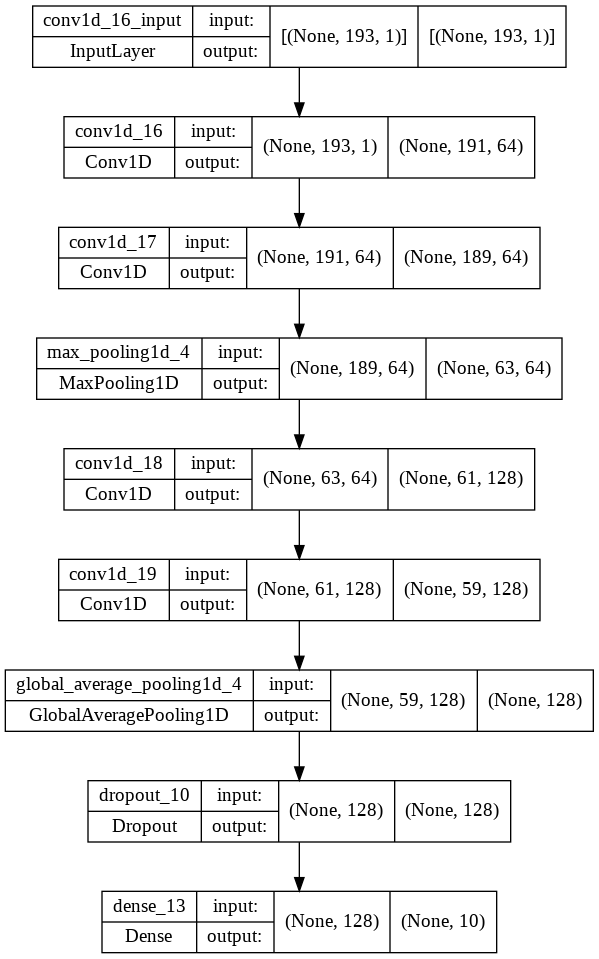

In [ ]:
plot_model(model, to_file="my_model_cnn_ec10.png", show_shapes=True)

In [ ]:
y_train = np_utils.to_categorical(y_train - 1, num_classes=10) # Converts a class vector (integers) to binary class matrix
y_test = np_utils.to_categorical(y_test - 1, num_classes=10)

X_train = np.expand_dims(X_train, axis=2) # Make 2-dim into 3-dim array to fit model
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
# Train Network
histoy_cnn = model.fit(X_train, y_train, batch_size=64, epochs=100,verbose=0)

In [ ]:
# Compute accuracy with test data
score, acc = model.evaluate(X_test, y_test, batch_size=16) # Computes the loss & accuracy based on the input you pass it

print('Test score:', score) #loss
print('Test accuracy:', acc)

10/10 [==============================] - 0s 8ms/step - loss: 0.9102 - accuracy: 0.7688
Test score: 0.9102414846420288
Test accuracy: 0.768750011920929


In [ ]:
acc = histoy_cnn.history['accuracy']
loss = histoy_cnn.history['loss']

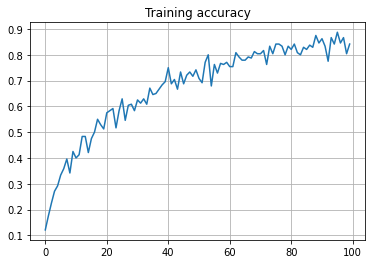

In [ ]:
plt.plot(acc)
plt.grid()
plt.title('Training accuracy')
plt.show()

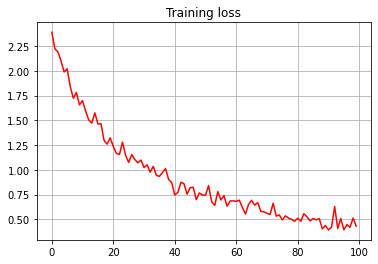

In [ ]:
plt.plot(loss,'r')
plt.grid()
plt.title('Training loss')
plt.show()

In [ ]:
histoy_cnn.history.keys()

dict_keys(['loss', 'accuracy'])

## Evaluate model using Adam optimizer

In [ ]:
# Neural Network Construction
model_adam = Sequential()

# Architecture
model_adam.add(Conv1D(64, 3, activation='relu', input_shape = (193, 1)))
model_adam.add(Conv1D(64, 3, activation='relu'))
model_adam.add(MaxPooling1D(3))
model_adam.add(Conv1D(128, 3, activation='relu'))
model_adam.add(Conv1D(128, 3, activation='relu'))
model_adam.add(GlobalAveragePooling1D())
model_adam.add(Dropout(0.5))
model_adam.add(Dense(10, activation='softmax'))

# Which is the best loss function for binary (multiple) classification
model_adam.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
histoy_cnn_adam = model_adam.fit(X_train, y_train, batch_size=64, epochs=100,verbose=0)

In [ ]:
# Compute accuracy with test data
score_adam, acc_adam = model_adam.evaluate(X_test, y_test, batch_size=16) # Computes the loss & accuracy based on the input you pass it

print('Test score using adam optimizer:', score_adam) #loss
print('Test accuracy using adam optimizer:', acc_adam)

10/10 [==============================] - 0s 14ms/step - loss: 0.9303 - accuracy: 0.7688
Test score using adam optimizer: 0.9303380846977234
Test accuracy using adam optimizer: 0.768750011920929


In [ ]:
acc_adam = histoy_cnn_adam.history['accuracy']
loss_adam = histoy_cnn_adam.history['loss']

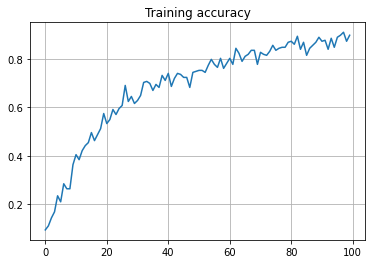

In [ ]:
plt.plot(acc_adam)
plt.grid()
plt.title('Training accuracy')
plt.show()

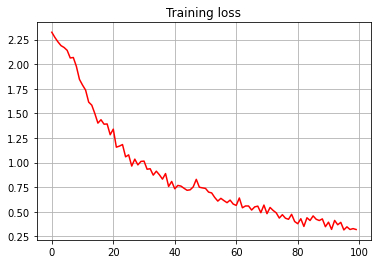

In [ ]:
plt.plot(loss_adam,'r')
plt.grid()
plt.title('Training loss')
plt.show()

#### Multilay Perceptron


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD


In [ ]:
#Load data from generated numpy files
X = np.load(path+'feat.npy') # list of features
y = np.load(path+'label_true.npy').ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [ ]:
# Build the Neural Network
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=193)) ## Dense method for MLP
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
y_train = np_utils.to_categorical(y_train - 1, num_classes=10) # Converts a class vector (integers) to binary class matrix
y_test = np_utils.to_categorical(y_test - 1, num_classes=10)

In [ ]:
# Train and test
history_perc = model.fit(X_train, y_train, epochs=100, batch_size=64,verbose=0) # Epochs are tunable
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

5/5 [==============================] - 0s 5ms/step - loss: 5.5220 - accuracy: 0.8062
Test score: 5.521969318389893
Test accuracy: 0.8062499761581421


In [ ]:
acc_perc = history_perc.history['accuracy']
loss_perc = history_perc.history['loss']

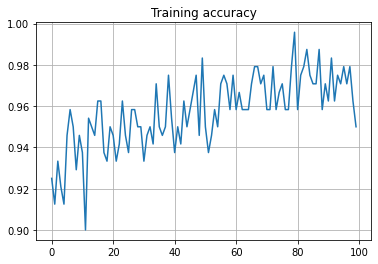

In [ ]:
plt.plot(acc_perc)
plt.grid()
plt.title('Training accuracy')
plt.show()

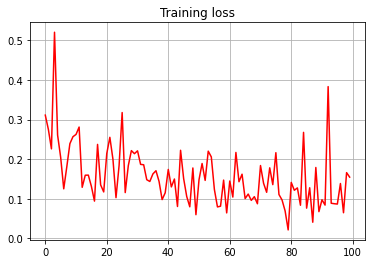

In [ ]:
plt.plot(loss_perc,'r')
plt.grid()
plt.title('Training loss')
plt.show()

- Accuracy with MLP: 0.80625 (250 epochs)
- Accuracy: 0.63125 (100 epochs)
- MLP is the faster of the 3 neural networks
- A classification predictor can be visualized by drawing the boundary line.

- Accuracy with NB: 0.697 (33% Test data)

#### Random Forest Classification (Sklearn)

In [ ]:
# coding= UTF-8
from sklearn.ensemble import RandomForestClassifier #Random Forest classifier
import pandas as pd 
import numpy as np
np.random.seed(0)

In [ ]:


#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize classifier
rf_clf = RandomForestClassifier(n_jobs=2, random_state=0) #Check params

# Train model
rf_clf.fit(X_train, y_train)

# Make predictions
y_prediction = rf_clf.predict(X_test)

#print('Predicted values')
#print(y_prediction)
#print
#print('Actual values')
#print(y_test)
#print

# Evaluate accuracy
print
acc = rf_clf.score(X_test, y_test) 
print("Accuracy = %0.3f" %acc)

Accuracy = 0.883


- Accuracy with Random Forest: 0.800 (30% test data)

In [ ]:
# View the predicted probabilities of the first n observations
rf_clf.predict_proba(X_test)[0:10]

array([[0.01, 0.11, 0.05, 0.  , 0.  , 0.6 , 0.11, 0.07, 0.  , 0.05],
       [0.  , 0.03, 0.12, 0.01, 0.  , 0.05, 0.05, 0.74, 0.  , 0.  ],
       [0.5 , 0.  , 0.02, 0.1 , 0.  , 0.05, 0.04, 0.01, 0.28, 0.  ],
       [0.  , 0.19, 0.  , 0.02, 0.26, 0.09, 0.  , 0.  , 0.05, 0.39],
       [0.03, 0.18, 0.11, 0.06, 0.  , 0.45, 0.08, 0.07, 0.  , 0.02],
       [0.01, 0.52, 0.09, 0.01, 0.01, 0.02, 0.26, 0.01, 0.  , 0.07],
       [0.11, 0.01, 0.  , 0.17, 0.05, 0.03, 0.  , 0.  , 0.63, 0.  ],
       [0.02, 0.13, 0.81, 0.  , 0.  , 0.01, 0.03, 0.  , 0.  , 0.  ],
       [0.03, 0.04, 0.08, 0.01, 0.  , 0.02, 0.28, 0.53, 0.  , 0.01],
       [0.05, 0.02, 0.02, 0.76, 0.  , 0.05, 0.  , 0.08, 0.02, 0.  ]])

In [ ]:
# Dencoding predicted and actual classes (numeric to written)
prediction_decoded = label_classes[y_prediction]
actual_value_decoded = label_classes[y_test]
#print(y_prediction)
#print(y_test)
print('Prediction decoded')
print(prediction_decoded)
print
print('Actual class decoded')
print(actual_value_decoded)

Prediction decoded
['Person sneeze' 'Chainsaw' 'Dog bark' 'Fire crackling' 'Person sneeze'
 'Rain' 'Rooster' 'Sea waves' 'Chainsaw' 'Baby cry' 'Dog bark'
 'Fire crackling' 'Rain' 'Rain' 'Baby cry' 'Rain' 'Helicopter'
 'Fire crackling' 'Rooster' 'Fire crackling' 'Rain' 'Dog bark'
 'Fire crackling' 'Helicopter' 'Dog bark' 'Fire crackling' 'Sea waves'
 'Person sneeze' 'Helicopter' 'Sea waves' 'Fire crackling' 'Clock tick'
 'Helicopter' 'Rain' 'Person sneeze' 'Sea waves' 'Sea waves' 'Rooster'
 'Baby cry' 'Baby cry' 'Fire crackling' 'Rain' 'Rain' 'Chainsaw'
 'Sea waves' 'Fire crackling' 'Baby cry' 'Clock tick' 'Dog bark'
 'Clock tick' 'Rain' 'Helicopter' 'Rooster' 'Rain' 'Fire crackling'
 'Dog bark' 'Person sneeze' 'Clock tick' 'Dog bark' 'Baby cry' 'Baby cry'
 'Chainsaw' 'Chainsaw' 'Rain' 'Sea waves' 'Dog bark' 'Rooster'
 'Helicopter' 'Fire crackling' 'Rain' 'Rooster' 'Baby cry' 'Dog bark'
 'Rain' 'Fire crackling' 'Helicopter' 'Person sneeze' 'Fire crackling'
 'Clock tick' 'Chainsaw' 'Dog 

In [ ]:
## Confusion Matrix
pd.crosstab(actual_value_decoded, prediction_decoded)
#pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])


col_0,Baby cry,Chainsaw,Clock tick,Dog bark,Fire crackling,Helicopter,Person sneeze,Rain,Rooster,Sea waves
row_0,,,,,,,,,,
Baby cry,11,0,0,0,0,0,0,0,0,0
Chainsaw,0,9,0,0,0,0,0,1,0,0
Clock tick,0,0,6,0,0,0,0,0,0,0
Dog bark,0,1,0,13,0,0,0,0,1,0
Fire crackling,0,0,1,0,15,0,0,0,0,0
Helicopter,0,2,0,0,0,9,0,1,0,0
Person sneeze,0,0,0,1,1,0,8,0,1,0
Rain,0,0,0,0,0,0,0,17,0,0
Rooster,1,0,0,0,0,1,0,0,7,0


## Results of the model

In [ ]:
index = ["CNN RMSprop", "CNN Adam", "Multilayer perceptron", "SVM", "Random Forest"]
results ={"Accuracy":[0.971, 0.961, 0.913, 0.903, 0.971, 0.961, 0.92],
          "Precision":[0.905, 0.864, 0.69, 0.75, 0.947, 0.944, 0.8],
          "Recall":[0.95, 0.95, 1, 0.75, 0.9, 0.85, 0.8],
          "F1":[0.927, 0.905, 0.816, 0.75, 0.923, 0.895, 0.8]}

In [ ]:
import dataframe_image as dfi


###Acc Results 


In [ ]:
import pandas as pd

df = pd.DataFrame({'SVM': [81.7, 0,],
                   'CNN': [78.125, 71.25],
                   'MLP':[80.625, 63.125],
                   'NB': [69.7, 0],
                   'RF': [80, 0],
                   'RNN': [66, 0],})
df

,CNN,MLP,NB,RF,RNN,SVM
0,78.125,80.625,69.7,80,66,81.7
1,71.250,63.125,0.0,0,0,0.0


In [ ]:
import pandas as pd

In [ ]:
t = pd.DataFrame({'SVM': 0.787,
                   'CNN': 0.768,
                   'MLP':0.806,
                   'RF': [0.883],
                  'NB':0.68})
t

,SVM,CNN,MLP,RF,NB
0,0.787,0.768,0.806,0.883,0.68
